In [40]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_groq import ChatGroq
from typing import TypedDict, Annotated
from pydantic import BaseModel, Field
from dotenv import load_dotenv
import os
from langchain_core.messages import HumanMessage, BaseMessage
from langgraph.checkpoint.memory import MemorySaver
import operator

In [41]:
class ChatState(TypedDict):
    messages : Annotated[list[BaseMessage], add_messages]

In [42]:
llm = ChatGroq(
    model=os.getenv("model"),
    api_key=os.getenv("api_key")
)
def chatModel(state : ChatState):
    message = state["messages"]
    response = llm.invoke(message)
    return {'messages' : [response]}

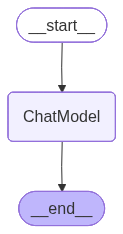

In [43]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

graph.add_node("ChatModel", chatModel)
graph.add_edge(START, "ChatModel")
graph.add_edge("ChatModel", END)

workflow = graph.compile(checkpointer=checkpointer)
workflow


In [20]:
config = {'configurable' : {'thread_id' : 1}}
intial = {'messages' : [(HumanMessage(content='What is pytorch?'))]}
workflow.invoke(intial, config=config)

{'messages': [HumanMessage(content='What is pytorch?', additional_kwargs={}, response_metadata={}, id='560ce2e0-84fc-4490-828b-ce2389b9a163'),
  AIMessage(content='**PyTorch** is an open‑source machine‑learning library developed by Facebook’s AI Research lab (FAIR). It provides:\n\n- **Tensor computation** with strong GPU acceleration (similar to NumPy but with GPU support).\n- **Dynamic computational graphs** (define‑by‑run), which make debugging and model development intuitive.\n- A rich ecosystem for **deep learning**: neural‑network layers, loss functions, optimizers, and utilities for data loading and preprocessing.\n- Integration with **Python** and a growing set of tools (e.g., TorchVision, TorchText, TorchAudio) for computer vision, natural language processing, and audio tasks.\n\nIn short, PyTorch is a flexible, high‑performance framework for building and training neural networks and other machine‑learning models.', additional_kwargs={}, response_metadata={'token_usage': {'com

In [44]:
thread_id1 = 1
thread_id2 = 2
while True:
    query = input("type here")

    if query.strip().lower() in ["exit", "bye", "quit"]:
        break
    else:
        config = {'configurable' : {'thread_id' : thread_id1}}
        print("User: ",query)
        print("AI: ",workflow.invoke({"messages" : [HumanMessage(content=query)]}, config=config)['messages'][-1].content)
        

User:  what is 2+2
AI:  2 + 2 = 4.
User:  now multiply it with 10
AI:  \(4 \times 10 = 40\).


In [45]:
workflow.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='what is 2+2', additional_kwargs={}, response_metadata={}, id='aa4e94fc-a288-48bb-afb2-4adb1b01b196'), AIMessage(content='2\u202f+\u202f2\u202f=\u202f4.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 447, 'total_tokens': 488, 'completion_time': 0.099994, 'completion_tokens_details': None, 'prompt_time': 0.027425, 'prompt_tokens_details': None, 'queue_time': 0.103422, 'total_time': 0.12742}, 'model_name': 'groq/compound-mini', 'system_fingerprint': None, 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b970a-f0ac-7df2-b784-a0abd1dc700c-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 447, 'output_tokens': 41, 'total_tokens': 488}), HumanMessage(content='now multiply it with 10', additional_kwargs={}, response_metadata={}, id='73f89b0a-bced-472b-8cbc-aa510f65ef94'), AIMessage(content='\\(4 \

In [38]:
list(workflow.get_state_history(config=config))

[StateSnapshot(values={'messages': [HumanMessage(content='What is pytorch?', additional_kwargs={}, response_metadata={}, id='560ce2e0-84fc-4490-828b-ce2389b9a163'), AIMessage(content='**PyTorch** is an open‑source machine‑learning library developed by Facebook’s AI Research lab (FAIR). It provides:\n\n- **Tensor computation** with strong GPU acceleration (similar to NumPy but with GPU support).\n- **Dynamic computational graphs** (define‑by‑run), which make debugging and model development intuitive.\n- A rich ecosystem for **deep learning**: neural‑network layers, loss functions, optimizers, and utilities for data loading and preprocessing.\n- Integration with **Python** and a growing set of tools (e.g., TorchVision, TorchText, TorchAudio) for computer vision, natural language processing, and audio tasks.\n\nIn short, PyTorch is a flexible, high‑performance framework for building and training neural networks and other machine‑learning models.', additional_kwargs={}, response_metadata={